In [143]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from spellchecker import SpellChecker
%matplotlib inline
import matplotlib.pyplot as plt

In [104]:
df_1 = pd.read_csv('PERM_Disclosure_Data_FY2018_EOY.csv')

C:\Users\bodav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_2 = pd.read_csv('PERM_Disclosure_Data_FY17.csv')

In [7]:
# Merging two datasets
df_3 = pd.concat([df_1,df_2],join = 'inner',ignore_index=True,sort = False)

In [8]:
df_3.head()

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
0,A-17268-91243,10/1/2017,Withdrawn,9/29/2017,N,NaN,NaN,N,DATA MEANING SERVICES GROUP,3301 NORTH UNIVERSITY DRIVE,...,A,Y,A,A,N,Counsel,Human Capital Manager,541511,Custom Computer Programming Services,Web Architect
1,A-17268-91198,10/1/2017,Withdrawn,9/29/2017,N,NaN,NaN,N,NOVO NORDISK INC.,800 SCUDDERS MILL ROAD,...,A,A,A,Y,N,Partner,"Associate Director, Mobility - Human Resources",325412,Pharmaceutical Preparation Manufacturing,Senior Systems Analyst
2,A-17275-93842,10/2/2017,Withdrawn,10/2/2017,N,NaN,NaN,N,HITACHI CONSULTING CORPORATION,14643 DALLAS PARKWAY,...,A,A,N,Y,N,Of Counsel,"Director, Global Immigration Services",541512,Computer Systems Design Services,Computer Systems Analysts
3,A-17257-86988,10/2/2017,Withdrawn,10/2/2017,N,NaN,NaN,N,HITACHI CONSULTING CORPORATION,14643 DALLAS PARKWAY,...,A,A,N,Y,N,Of Counsel,"Director, Global Immigration Services",541512,Computer Systems Design Services,Computer Systems Analysts
4,A-17263-89145,10/2/2017,Withdrawn,10/2/2017,N,NaN,NaN,N,FANATICS RETAIL GROUP FULFILLMENT INC DBA FANA...,8100 NATIONS WAY,...,A,N,N,Y,N,Attorney,Director of Talent Acquisition,45411,Electronic Shopping and Mail-Order Houses,Statisticians


In [30]:
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
if 'JOB_INFO_TRAINING_NUM_MONTHS' in df_2.columns:
    print(True)
else:
    print(False)

(119776, 125)
(97603, 125)
(217379, 124)
True


In [117]:
Dataset = df_3[['EMPLOYER_NAME','EMPLOYER_COUNTRY','EMPLOYER_NUM_EMPLOYEES','EMPLOYER_YR_ESTAB','PW_SOC_CODE','PW_SOC_TITLE',
               'PW_AMOUNT_9089','PW_UNIT_OF_PAY_9089','WAGE_OFFER_UNIT_OF_PAY_9089','JOB_INFO_JOB_TITLE','JOB_INFO_EDUCATION',
               'JOB_INFO_MAJOR','JOB_INFO_TRAINING','JOB_INFO_EXPERIENCE','JOB_INFO_ALT_FIELD','JOB_INFO_ALT_COMBO_ED_EXP',
                'JI_OFFERED_TO_SEC_J_FW','JI_FW_LIVE_ON_PREMISES','NAICS_US_CODE','NAICS_US_TITLE','PW_JOB_TITLE_9089']]
print(Dataset.shape)
print(Dataset.isna().sum().sum())
Dataset.dropna(inplace = True)
print(Dataset.shape)
Dataset.isna().sum().sum()
Dataset.reset_index(inplace = True)
Dataset.drop(columns=['index'],inplace = True)

(217379, 21)
31178


C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(187619, 21)


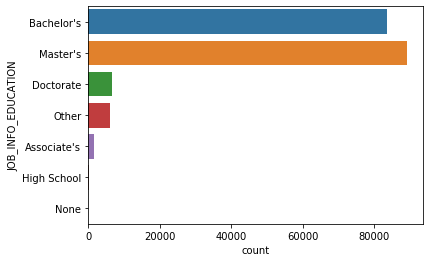

In [81]:
Dataset['JOB_INFO_EDUCATION'].value_counts()
ax = sns.countplot(y = "JOB_INFO_EDUCATION", data = Dataset)

In [128]:
#Same position with different names(Computer Systems Analyst,Computer Systems Analyst), so changing them
Dataset.replace('Computer Systems Analysts', 'Computer Systems Analyst',inplace = True)
Dataset.replace('Softwae Developers', 'Software Developers, Applications',inplace = True)
Dataset.replace('Elecronics Engineers,Except Computer', 'Electronics Engineers, Except Computer',inplace = True)
Dataset['PW_JOB_TITLE_9089'] = Dataset['PW_JOB_TITLE_9089'].str.lower()
spell = SpellChecker()


C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [132]:
# whether the company is sponsoring or not
#Y : Sponsoring
#N : Not sponsoring
Dataset['JI_OFFERED_TO_SEC_J_FW'].value_counts()

# Companies that are hiring more than 100 people 
Dataset['EMPLOYER_NAME'].value_counts()
Filtered_Companies = Dataset.groupby("EMPLOYER_NAME").filter(lambda x : len(x)>100)
Filtered_Companies
Filtered_Companies.reset_index(inplace = True)
Filtered_Companies.drop(['index'],axis = 1, inplace = True)
Filtered_Companies
print(Filtered_Companies['PW_JOB_TITLE_9089'].value_counts().head(10))
print(Filtered_Companies['JOB_INFO_EDUCATION'].value_counts())
# Filtered roles if they are greater than 100
Filtered_positions = Filtered_Companies.groupby("PW_JOB_TITLE_9089").filter(lambda x : len(x)>100)

software developers, applications            25687
software developers, systems software        10705
computer systems analyst                      8138
electronics engineers, except computer        3941
computer occupations, all other               3098
computer and information systems managers     1841
statisticians                                 1181
management analysts                            953
accountants and auditors                       934
marketing managers                             815
Name: PW_JOB_TITLE_9089, dtype: int64
Master's       38161
Bachelor's     28938
Doctorate        897
Other            352
Associate's       76
None               1
Name: JOB_INFO_EDUCATION, dtype: int64


# Comparision of job roles with respect to education

C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\bodav\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyW

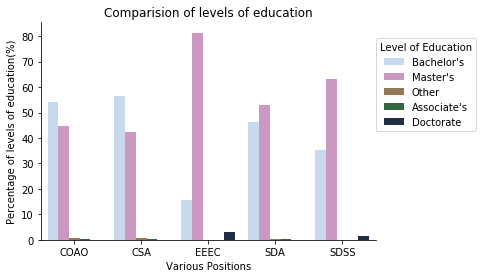

In [205]:
plot = Dataset[['JOB_INFO_EDUCATION','PW_JOB_TITLE_9089']]
plot
plot_1 = plot[plot['PW_JOB_TITLE_9089'].isin(['software developers, applications','software developers, systems software',
            'computer systems analyst','electronics engineers, except computer','computer occupations, all other'])]
plot_1.loc[(plot_1.PW_JOB_TITLE_9089 == 'software developers, applications'),'PW_JOB_TITLE_9089'] = 'SDA'
plot_1.loc[(plot_1.PW_JOB_TITLE_9089 == 'software developers, systems software'),'PW_JOB_TITLE_9089'] = 'SDSS'
plot_1.loc[(plot_1.PW_JOB_TITLE_9089 == 'computer systems analyst'),'PW_JOB_TITLE_9089'] = 'CSA'
plot_1.loc[(plot_1.PW_JOB_TITLE_9089 == 'electronics engineers, except computer'),'PW_JOB_TITLE_9089'] = 'EEEC'
plot_1.loc[(plot_1.PW_JOB_TITLE_9089 == 'computer occupations, all other'),'PW_JOB_TITLE_9089'] = 'COAO'

plot_1 = plot_1[plot_1['JOB_INFO_EDUCATION'].isin(["Master's","Bachelor's","Doctorate","Other","Associate's"])]
#print(plot_1)
plot_2 = plot_1.groupby(['PW_JOB_TITLE_9089'])['JOB_INFO_EDUCATION'].value_counts(ascending = False, normalize = True)
#print(plot_2)
plot_2=plot_2.reset_index(name= '%')
plot_2['%']=100*plot_2['%']
plot_2
bar_plot = sns.barplot(x = 'PW_JOB_TITLE_9089', y = '%', hue = 'JOB_INFO_EDUCATION', palette = "cubehelix_r", data = plot_2)
leg = bar_plot.legend(title = 'Level of Education',loc = (1,0.5))
sns.despine(top=True, right=True)
plt.xlabel('Various Positions')
plt.ylabel('Percentage of levels of education(%)')
plt.title("Comparision of levels of education")
plt.show()

In [ ]:
#RANDOM FOREST REGRESSOR
